In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [85]:
df = pd.read_csv('NSE-Tata.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [86]:
df['Date'] = pd.to_datetime(df['Date'], format= "%Y-%m-%d")
df.index = df['Date']
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


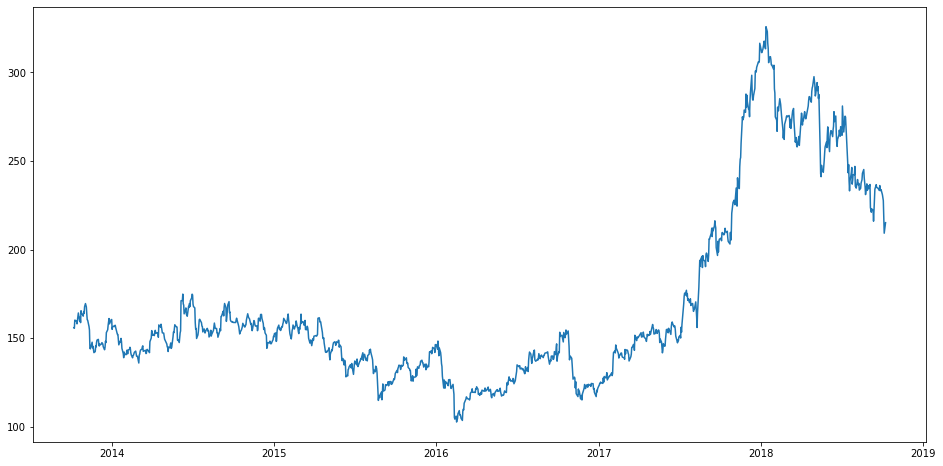

In [87]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label = "Close Price History")

In [88]:
data = df.sort_index(ascending= True , axis=0)
new_dataset  = pd.DataFrame(index= range(0, len(df)) , columns= [ 'Date','Close'])

for i in range(0, len(data)):
    new_dataset['Date'][i] = data['Date'][i]
    new_dataset['Close'][i] = data['Close'][i]

In [89]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [90]:
new_dataset.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [91]:
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [92]:
final_dataset=new_dataset.values


In [93]:
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

In [94]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [95]:
x_train_data,y_train_data=[],[]


In [96]:
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [97]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)


In [98]:
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))


In [99]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [100]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=5,batch_size=1,verbose=2)

Epoch 1/5
927/927 - 48s - loss: 0.0012 - 48s/epoch - 51ms/step
Epoch 2/5
927/927 - 28s - loss: 5.5007e-04 - 28s/epoch - 30ms/step
Epoch 3/5
927/927 - 32s - loss: 3.6560e-04 - 32s/epoch - 34ms/step
Epoch 4/5
927/927 - 31s - loss: 3.0216e-04 - 31s/epoch - 34ms/step
Epoch 5/5
927/927 - 44s - loss: 2.8276e-04 - 44s/epoch - 48ms/step


In [101]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [102]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [103]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

8/8 [==============================] - 4s 47ms/step


In [104]:
lstm_model.save("saved_lstm_model.h5")


C:\Users\Admin\AppData\Local\Temp\ipykernel_6148\4030469915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=closing_price


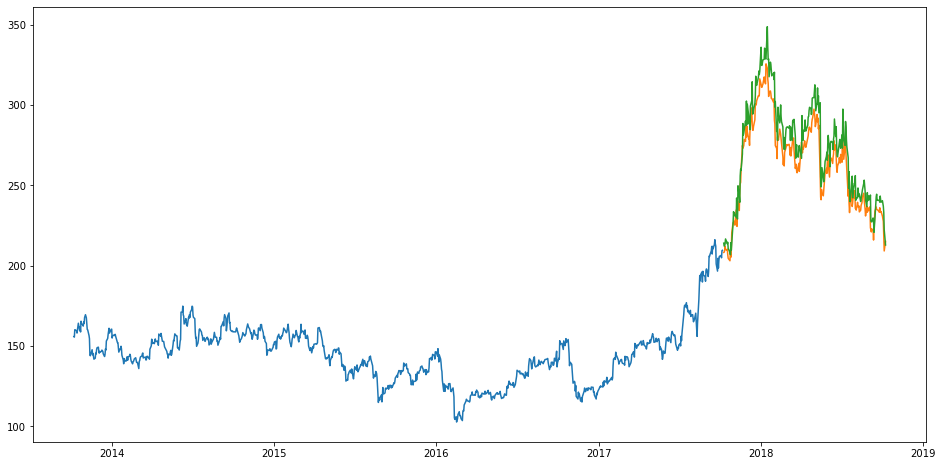

In [105]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=closing_price
plt.figure(figsize = (16,8))
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])